In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#Read the csv file
df = pd.read_csv("train.csv")
print(df.shape)

(159571, 8)


In [7]:
#List of features and labels
print(df.dtypes)

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object


In [8]:
#calculating number of comments for each label
labels=['malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe']
for label in labels:
    print(df[label].value_counts())

0    144277
1     15294
Name: malignant, dtype: int64
0    157976
1      1595
Name: highly_malignant, dtype: int64
0    151122
1      8449
Name: rude, dtype: int64
0    159093
1       478
Name: threat, dtype: int64
0    151694
1      7877
Name: abuse, dtype: int64
0    158166
1      1405
Name: loathe, dtype: int64


In [9]:
#calculating percentage of comments for each label
per=[]
for label in labels:
    x=df[label].value_counts()[1]/df.shape[0]*100
    per.append("{:.1f}".format(x))
per

['9.6', '1.0', '5.3', '0.3', '4.9', '0.9']

In [10]:
#separating labels
df_label=df[labels]
df_label.head()
#calculating the frequency of occurence of multilabelled data
f1=0
f2=0
f3=0
f4=0
f5=0
f6=0

for i in range(df.shape[0]):
    f=np.count_nonzero(df_label.iloc[[i]])
    if f==1:
        f1=f1+1
    if f==2:
        f2=f2+1
    if f==3:
        f3=f3+1
    if f==4:
        f4=f4+1
    if f==5:
        f5=f5+1
    if f==6:
        f6=f6+1

print(f1,f2,f3,f4,f5,f6)

6360 3480 4209 1760 385 31


In [11]:
#length of comments
x=[len(df['comment_text'][i]) for i in range(df.shape[0])]
x

[264,
 112,
 233,
 622,
 67,
 65,
 44,
 115,
 472,
 70,
 2875,
 56,
 319,
 819,
 219,
 610,
 57,
 48,
 118,
 440,
 266,
 58,
 543,
 97,
 1409,
 172,
 288,
 343,
 119,
 78,
 92,
 69,
 68,
 877,
 283,
 809,
 1289,
 345,
 148,
 1191,
 216,
 198,
 648,
 40,
 319,
 813,
 93,
 109,
 696,
 1180,
 3150,
 124,
 180,
 538,
 56,
 89,
 68,
 692,
 1798,
 360,
 112,
 299,
 33,
 986,
 172,
 311,
 120,
 151,
 204,
 218,
 195,
 338,
 65,
 1331,
 201,
 75,
 236,
 270,
 168,
 64,
 1135,
 2749,
 516,
 295,
 109,
 113,
 73,
 47,
 338,
 26,
 809,
 497,
 75,
 87,
 527,
 554,
 55,
 136,
 174,
 264,
 96,
 177,
 84,
 408,
 103,
 42,
 897,
 647,
 139,
 200,
 96,
 51,
 669,
 414,
 1615,
 60,
 539,
 225,
 293,
 53,
 229,
 294,
 258,
 238,
 124,
 128,
 4364,
 190,
 256,
 490,
 248,
 146,
 281,
 198,
 701,
 202,
 89,
 224,
 46,
 43,
 999,
 414,
 1971,
 321,
 114,
 683,
 64,
 195,
 493,
 386,
 719,
 554,
 60,
 462,
 105,
 244,
 154,
 365,
 245,
 99,
 3958,
 277,
 2592,
 112,
 158,
 148,
 718,
 748,
 133,
 332,
 303,


In [12]:
df_com_len=pd.DataFrame(x)
df_com_len.describe()

,0
count,159571.000000
mean,394.138847
std,590.725381
min,5.000000
25%,96.000000
50%,205.000000
75%,436.000000
max,5000.000000


We have a huge dataset consisting of 159571 samples which have 8 fields each. Running train_test_split on the heavy preprocessed dataframe sometimes resulted in memory error. The df.reindex code will shuffle the indices initially, so that later splitting dataset into training and testing will give fairer results.

In [13]:
#shuffling of indices
df = df.reindex(np.random.permutation(df.index))

# Separation of comments and labels

In [14]:
comment = df['comment_text']
print(comment.head())
comment = comment.to_numpy()

73701                            "==June 2008==\n |(talk) "
12066     "\n\nHello, Wood Dickinson. I will try to clar...
33258     Hey user:jeppiz \n\nI was busy a little bit th...
20298     "\n\nYour make a good point.  Let me first add...
130622                THE CHINESE MAN SUCxS PRAWN BALLS lol
Name: comment_text, dtype: object


In [15]:
label = df[['malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe']]
print(label.head())
label = label.to_numpy()

        malignant  highly_malignant  rude  threat  abuse  loathe
73701           0                 0     0       0      0       0
12066           0                 0     0       0      0       0
33258           1                 0     0       0      0       0
20298           0                 0     0       0      0       0
130622          1                 0     0       0      0       0


# Data Visualisations

In [16]:
np.percentile(df_com_len,90)

890.0

90 % of the comments have length less than 900. Let us analyse the number of comments having lengths varying from 0 to 1000

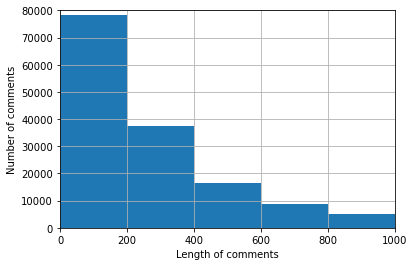

In [17]:
x = [len(comment[i]) for i in range(comment.shape[0])]
bins = [1,200,400,600,800,1000]
plt.hist(x, bins=bins)
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')       
plt.axis([0, 1000, 0, 80000])
plt.grid(True)
plt.show()

# Number of comments classified as 'malignant', 'highly_malignant', 'rude', 'threat','abuse'and 'loathe'

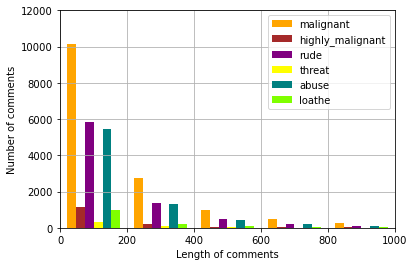

In [18]:
y = np.zeros(label.shape)
for ix in range(comment.shape[0]):
    l = len(comment[ix])
    if label[ix][0] :
        y[ix][0] = l
    if label[ix][1] :
        y[ix][1] = l
    if label[ix][2] :
        y[ix][2] = l
    if label[ix][3] :
        y[ix][3] = l
    if label[ix][4] :
        y[ix][4] = l
    if label[ix][5] :
        y[ix][5] = l

labelsplt = ['malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe']
color = ['orange','brown','purple','yellow','teal','chartreuse']        
plt.hist(y,bins = bins,label = labelsplt,color = color)
plt.axis([0, 1000, 0, 12000])
plt.xlabel('Length of comments')
plt.ylabel('Number of comments') 
plt.legend()
plt.grid(True)
plt.show()

# Remove comments of large length

Taking a large threshold for modellling resulted in memory and sometimes the kernel died due to very heavy computation. Large comments add large number of words to the training set causing memory error most of the time.

Hence, a threshold of 100 characters will be created and only comments which have length smaller than 100 will be used.

In [19]:
comments = []
labels = []

for ix in range(comment.shape[0]):
    if len(comment[ix])<=100:
        comments.append(comment[ix])
        labels.append(label[ix])
        
#comment length <=100 is chosen because the kernel was crashing due to heavy memory usage and some model needed more memory space 

In [20]:
labels = np.asarray(labels)

In [21]:
print(len(comments))

42043


Hence, after removing comments longer than 100 characters, we are still left with more than 42000 comments, which seems enough for training purposes.

In [22]:
#Punctuation removal
import string
print(string.punctuation)
punctuation_edit = string.punctuation.replace('\'','') +"0123456789"
print (punctuation_edit)
outtab = "                                         "
trantab = str.maketrans(punctuation_edit, outtab)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
!"#$%&()*+,-./:;<=>?@[\]^_`{|}~0123456789


In [23]:
#Importing and appending stop words
from stop_words import get_stop_words
stop_words = get_stop_words('english')
stop_words.append('')

for x in range(ord('b'), ord('z')+1):
    stop_words.append(chr(x))

In [24]:
stop_words_additional=['aren', 'can', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn']

In [25]:
for x in range(len(stop_words_additional)):
    stop_words.append(stop_words_additional[x])

In [26]:
stop_words

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 "can't",
 'cannot',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 "let's",
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'ought',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'same',
 "shan't",
 'she',
 "she'd",
 "she'll",
 "she's",
 'should',
 "s

In [27]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [28]:
#create objects for stemmer and lemmatizer
lemmatiser = WordNetLemmatizer()
stemmer = PorterStemmer()
#download words from wordnet library
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/ashish/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:
for i in range(len(comments)):
    comments[i] = comments[i].lower().translate(trantab)
    l = []
    for word in comments[i].split():
        l.append(stemmer.stem(lemmatiser.lemmatize(word,pos="v")))
    comments[i] = " ".join(l)

Applying Count Vectorizer

Here we can finally convert our comments into a matrix of token counts, which signifies the number of times it occurs.

In [30]:
#import required library
from sklearn.feature_extraction.text import CountVectorizer

#create object supplying our custom stop words
count_vector = CountVectorizer(stop_words=stop_words)
#fitting it to converts comments into bag of words format
tf = count_vector.fit_transform(comments).toarray()

In [31]:
# print(count_vector.get_feature_names())
print(tf.shape)

(42043, 24471)


We can imply that after all preprocessing we have a list of 42403 words in total.

Splitting dataset into training and testing
    Since the system was going out of memory using train_test_split, I had jumbled all the indexes in the beginning itself.
    The shuffle function defined here performs the task of assigning first 2/3rd values to train and remaining 1/3rd values to the test set.

In [32]:
def shuffle(matrix, target, test_proportion):
    ratio = int(matrix.shape[0]/test_proportion)
    X_train = matrix[ratio:,:]
    X_test =  matrix[:ratio,:]
    Y_train = target[ratio:,:]
    Y_test =  target[:ratio,:]
    return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = shuffle(tf, labels,3)

print(X_test.shape)
print(X_train.shape)

(14014, 24471)
(28029, 24471)


Evaluation metrics

In [30]:
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

def evaluate_score(Y_test,predict): 
    loss = hamming_loss(Y_test,predict)
    print("Hamming_loss : {}".format(loss*100))
    accuracy = accuracy_score(Y_test,predict)
    print("Accuracy : {}".format(accuracy*100))
    try : 
        loss = log_loss(Y_test,predict)
    except :
        loss = log_loss(Y_test,predict.toarray())
    print("Log_loss : {}".format(loss))

# 1. Binary Relevance (BR) with MultinomialNB Classifier

In [36]:
from sklearn.naive_bayes import MultinomialNB

In [59]:
# clf will be the list of the classifiers for all the 6 labels
# each classifier is fit with the training data and corresponding classifier
clf = []
for ix in range(6):
    clf.append(MultinomialNB())
    clf[ix].fit(X_train,Y_train[:,ix])

In [60]:
# predict list contains the predictions, it is transposed later to get the proper shape
predict = []
for ix in range(6):
    predict.append(clf[ix].predict(X_test))

predict = np.asarray(np.transpose(predict))
print(predict.shape)

(14014, 6)


In [61]:
# calculate results
evaluate_score(Y_test,predict)

Hamming_loss : 4.217211360068503
Accuracy : 84.8936777508206
Log_loss : 2.8177969411014705


# 2. BR with SVM Classifier

In [62]:
#create and fit classifier
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.svm import SVC
classifier = BinaryRelevance(classifier = SVC(), require_dense = [False, True])
classifier.fit(X_train, Y_train)

BinaryRelevance(classifier=SVC(), require_dense=[False, True])

In [63]:
#predictions
predictions = classifier.predict(X_test)

In [64]:
#calculate scores
evaluate_score(Y_test,predictions)

Hamming_loss : 2.949431520860092
Accuracy : 87.89068074782361
Log_loss : 2.479267763050564


# 3. BR with Multinomial Classifier

In [65]:
#create and fit classifier
classifier = BinaryRelevance(classifier = MultinomialNB(), require_dense = [False, True])
classifier.fit(X_train, Y_train)

BinaryRelevance(classifier=MultinomialNB(), require_dense=[False, True])

In [66]:
#predictions
predictions = classifier.predict(X_test)

In [67]:
#calculate scores
evaluate_score(Y_test,predictions)

Hamming_loss : 4.217211360068503
Accuracy : 84.8936777508206
Log_loss : 2.8177969411014705


# 4. BR with GausseanNB Classifier

In [31]:
from sklearn.naive_bayes import GaussianNB
#create and fit classifiers
clf = []
for ix in range(6):
    clf.append(GaussianNB())
    clf[ix].fit(X_train,Y_train[:,ix])

In [33]:
#predictions
predict = []
for ix in range(6):
    predict.append(clf[ix].predict(X_test))

In [34]:
#calculate scores
predict = np.asarray(np.transpose(predict))
evaluate_score(Y_test,predict)

Hamming_loss : 23.84639170353456
Accuracy : 45.50449550449551
Log_loss : 1.977799288807401


# 5. Classifier Chain with MultinomialNB Classifier

In [37]:
#create and fit classifier
from skmultilearn.problem_transform import ClassifierChain
classifier = ClassifierChain(MultinomialNB())
classifier.fit(X_train, Y_train)

ClassifierChain(classifier=MultinomialNB(), require_dense=[True, True])

In [38]:
#predictions
predictions = classifier.predict(X_test)

In [39]:
#calculate scores
evaluate_score(Y_test,predictions)

Hamming_loss : 4.451500880072309
Accuracy : 85.293278150421
Log_loss : 2.1836022582824905


# 6. Label Powerset with MultinomialNB Classifier

In [40]:
#create and fit classifier
from skmultilearn.problem_transform import LabelPowerset
classifier = LabelPowerset(MultinomialNB())
classifier.fit(X_train, Y_train)

LabelPowerset(classifier=MultinomialNB(), require_dense=[True, True])

In [41]:
#predictions
predictions = classifier.predict(X_test)

In [42]:
#calculate scores
evaluate_score(Y_test,predictions)

Hamming_loss : 3.8675610104181533
Accuracy : 85.88554302840016
Log_loss : 1.9162714424467173


# Adaptation Algorithms

# 7. MLkNN with k=3

In [43]:
#create and fit classifier
from skmultilearn.adapt import MLkNN
classifier_ML = MLkNN(k=3)
classifier_ML.fit(X_train, Y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_neighbors=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


MLkNN(k=3)

In [44]:
#predictions
predictions = classifier_ML.predict(X_test)

In [45]:
#calculate scores
evaluate_score(Y_test,predictions)

Hamming_loss : 5.11988011988012
Accuracy : 82.19637505351791
Log_loss : 2.0125109069254186


# Free Form Visualisation

Let us have a plot showing the hamming-loss and log-loss of different models, which we selected.

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import itertools

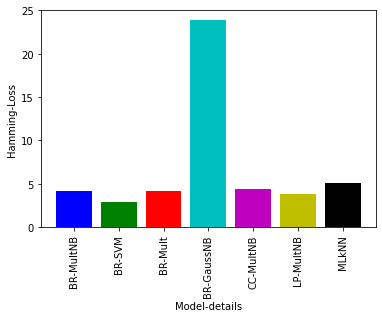

In [48]:
x = ['BR-MultNB','BR-SVM','BR-Mult','BR-GaussNB','CC-MultNB','LP-MultNB','MLkNN']
#x = ['BR-MultNB','BR-GausNB','BR-SVC','CC-MultNB','LP-MultNB','BP-MLL-ini','BP-MLL-fin']
y = [4.21,2.94,4.21,23.85,4.45,3.87,5.11]
#y = [3.27,20.74,4.26,3.56,3.17,13.96,15.158
colors = itertools.cycle(['b', 'g', 'r', 'c', 'm', 'y', 'k'])
plt.ylabel('Hamming-Loss')
plt.xlabel('Model-details')
plt.xticks(rotation=90)
for i in range(len(y)):
    plt.bar(x[i], y[i], color=next(colors))
plt.show()

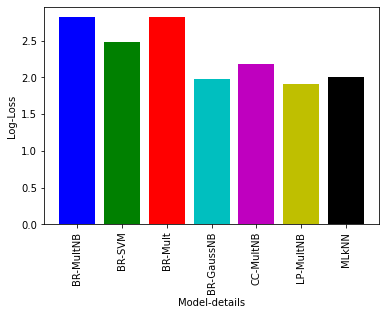

In [49]:
x = ['BR-MultNB','BR-SVM','BR-Mult','BR-GaussNB','CC-MultNB','LP-MultNB','MLkNN']
#x = ['BR-MultNB','BR-GausNB','BR-SVC','CC-MultNB','LP-MultNB','BP-MLL-ini','BP-MLL-fin']
y = [2.82,2.48,2.82,1.98,2.18,1.91,2.01]
#y = [1.92,1.422,0.46,1.5,1.47,0.36,0.35]
colors = itertools.cycle(['b', 'g', 'r', 'c', 'm', 'y', 'k'])
plt.ylabel('Log-Loss')
plt.xlabel('Model-details')
plt.xticks(rotation=90)
for i in range(len(y)):
    plt.bar(x[i], y[i], color=next(colors))
plt.show()

# Classification of Test Data Set

In [33]:
df = pd.read_csv("test.csv")
comment = df['comment_text']
comment = comment.to_numpy()

In [3]:
import string
print(string.punctuation)
punctuation_edit = string.punctuation.replace('\'','') +"0123456789"
print (punctuation_edit)
outtab = "                                         "
trantab = str.maketrans(punctuation_edit, outtab)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
!"#$%&()*+,-./:;<=>?@[\]^_`{|}~0123456789


In [34]:
for i in range(len(comment)):
    comment[i] = comment[i].lower().translate(trantab)
    l = []
    for word in comment[i].split():
        l.append(stemmer.stem(lemmatiser.lemmatize(word,pos="v")))
    comment[i] = " ".join(l)

In [ ]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
#create objects for stemmer and lemmatizer
lemmatiser = WordNetLemmatizer()
stemmer = PorterStemmer()
#download words from wordnet library
nltk.download('wordnet')

In [35]:
for i in range(len(comment)):
    comment[i] = comment[i].lower().translate(trantab)
    l = []
    for word in comment[i].split():
        l.append(stemmer.stem(lemmatiser.lemmatize(word,pos="v")))
    comment[i] = " ".join(l)

In [ ]:
from stop_words import get_stop_words
stop_words = get_stop_words('english')
stop_words.append('')

for x in range(ord('b'), ord('z')+1):
    stop_words.append(chr(x))
    
stop_words_additional=['aren', 'can', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn']
for x in range(len(stop_words_additional)):
    stop_words.append(stop_words_additional[x])

In [36]:
#create object supplying our custom stop words
count_vector = CountVectorizer(stop_words=stop_words)
#fitting it to converts comments into bag of words format
tf = count_vector.fit_transform(comment).toarray()

Not able to classify test dataset because the kernel is dying due to some technical issue

In [1]:
from sklearn.naive_bayes import MultinomialNB
from skmultilearn.problem_transform import LabelPowerset

classifier_final = LabelPowerset(MultinomialNB())
classifier_final.fit(X_train, Y_train)
predictions = classifier_final.predict(tf)

NameError: name 'X_train' is not defined

In [ ]:
test_data=pd.read_excel('test.csv')
df_pred=pd.concat([test_data,predictions],axis=1)
df_pred.head()